<a href="https://colab.research.google.com/github/irynadunets/Short-Course-2024-2025-CMM560---Computer-Vision-for-the-Energy-Sector---Summer/blob/main/Copy_of_CMM560_T5_Lab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Topic 5 Laboratory

In this activity you will use a database of **"extracted features"** to perform different types of classification.

## Installing the necessary packages

We will use `scikit-learn`, `scipy`, `plotly_express` and `matplotlib` for this activity. If you don't have these packages already, run the cell below:

In [1]:
!pip install scikit-learn
!pip install scipy
!pip install plotly_express
!pip install matplotlib

## Loading the Data

We will use the `IRIS` database, which contains 150 samples of the sepal and petal lengths and widths from 3 different iris flower species: Setosa, Versicolor and Virginica.

![Fig 1: Iris dataset.](https://www.dropbox.com/s/kqgsr9tmjdgou4g/iris.png?raw=1)

This dataset is already available in Python by importing the `sklearn.datasets` function and using the following command:

In [2]:
## Load iris dataset
from sklearn import datasets
iris = datasets.load_iris()

Notice that we will **NOT** work with the actual images, but rather with the numerical information extracted from some real flower samples.

In fact, this dataset was presented in 1936 by a statistician called Ronald Fisher, and thus we don't even have access to the original images to extract some proper feature from!

The dataset is contained on a **dictionary-like** structure referred to as **sklearn.utils.Bunch**.

In [3]:
type(iris)

sklearn.utils._bunch.Bunch

If you print this dataset, you will see a lot of things contained:

In [4]:
print(iris)

{'data': array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
     

Therefore, we need to extract each index of this dictionary into a different variables to understand and analyse them separately.

First, we will import the `features` into a variable called `data`:

In [5]:
data = iris['data']
print(data)
print(type(data))
print(data.shape)

[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]
 [5.4 3.7 1.5 0.2]
 [4.8 3.4 1.6 0.2]
 [4.8 3.  1.4 0.1]
 [4.3 3.  1.1 0.1]
 [5.8 4.  1.2 0.2]
 [5.7 4.4 1.5 0.4]
 [5.4 3.9 1.3 0.4]
 [5.1 3.5 1.4 0.3]
 [5.7 3.8 1.7 0.3]
 [5.1 3.8 1.5 0.3]
 [5.4 3.4 1.7 0.2]
 [5.1 3.7 1.5 0.4]
 [4.6 3.6 1.  0.2]
 [5.1 3.3 1.7 0.5]
 [4.8 3.4 1.9 0.2]
 [5.  3.  1.6 0.2]
 [5.  3.4 1.6 0.4]
 [5.2 3.5 1.5 0.2]
 [5.2 3.4 1.4 0.2]
 [4.7 3.2 1.6 0.2]
 [4.8 3.1 1.6 0.2]
 [5.4 3.4 1.5 0.4]
 [5.2 4.1 1.5 0.1]
 [5.5 4.2 1.4 0.2]
 [4.9 3.1 1.5 0.2]
 [5.  3.2 1.2 0.2]
 [5.5 3.5 1.3 0.2]
 [4.9 3.6 1.4 0.1]
 [4.4 3.  1.3 0.2]
 [5.1 3.4 1.5 0.2]
 [5.  3.5 1.3 0.3]
 [4.5 2.3 1.3 0.3]
 [4.4 3.2 1.3 0.2]
 [5.  3.5 1.6 0.6]
 [5.1 3.8 1.9 0.4]
 [4.8 3.  1.4 0.3]
 [5.1 3.8 1.6 0.2]
 [4.6 3.2 1.4 0.2]
 [5.3 3.7 1.5 0.2]
 [5.  3.3 1.4 0.2]
 [7.  3.2 4.7 1.4]
 [6.4 3.2 4.5 1.5]
 [6.9 3.1 4.

The data is stored in a `numpy array` of 150 rows and 4 columns, each corresponding to the  measurements of a flower.

Then, we will import the `headers` of the data:

In [6]:
header = iris['feature_names']
print(header, type(header))

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)'] <class 'list'>


**Why do you think the features and the header are stored separately?**

**YOUR Answer:**

Afterwards, we will import the **class/target**:

In [7]:
target = iris['target']
print(target, type(target), target.shape)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2] <class 'numpy.ndarray'> (150,)


The class/target is a `numpy array` which contains the **category** of each flowers.

Each sample is labelled as $0$, $1$ or $2$ instead of the iris type since the labels can be better used as numbers.

A separate key called **target_names** contains the name corresponding to each numerical label.

In [8]:
target_names = iris['target_names']
print(target_names, type(target_names), target_names.shape)

['setosa' 'versicolor' 'virginica'] <class 'numpy.ndarray'> (3,)


**Why do you think the target and the target names are stored separately?**

**YOUR Answer:**

In fact, We can use `list comprehension` to obtain a list of names instead of numerical labels

In [9]:
# Create a variable called "target_named" and store the actual categories
target_named = [target_names[t] for t in target]
print(target_named)

[np.str_('setosa'), np.str_('setosa'), np.str_('setosa'), np.str_('setosa'), np.str_('setosa'), np.str_('setosa'), np.str_('setosa'), np.str_('setosa'), np.str_('setosa'), np.str_('setosa'), np.str_('setosa'), np.str_('setosa'), np.str_('setosa'), np.str_('setosa'), np.str_('setosa'), np.str_('setosa'), np.str_('setosa'), np.str_('setosa'), np.str_('setosa'), np.str_('setosa'), np.str_('setosa'), np.str_('setosa'), np.str_('setosa'), np.str_('setosa'), np.str_('setosa'), np.str_('setosa'), np.str_('setosa'), np.str_('setosa'), np.str_('setosa'), np.str_('setosa'), np.str_('setosa'), np.str_('setosa'), np.str_('setosa'), np.str_('setosa'), np.str_('setosa'), np.str_('setosa'), np.str_('setosa'), np.str_('setosa'), np.str_('setosa'), np.str_('setosa'), np.str_('setosa'), np.str_('setosa'), np.str_('setosa'), np.str_('setosa'), np.str_('setosa'), np.str_('setosa'), np.str_('setosa'), np.str_('setosa'), np.str_('setosa'), np.str_('setosa'), np.str_('versicolor'), np.str_('versicolor'), np.

Finally, just in case you are interested, there is an entry called `DESC` containing the description of the dataset (a string):

In [10]:
iris['DESCR']

'.. _iris_dataset:\n\nIris plants dataset\n--------------------\n\n**Data Set Characteristics:**\n\n:Number of Instances: 150 (50 in each of three classes)\n:Number of Attributes: 4 numeric, predictive attributes and the class\n:Attribute Information:\n    - sepal length in cm\n    - sepal width in cm\n    - petal length in cm\n    - petal width in cm\n    - class:\n            - Iris-Setosa\n            - Iris-Versicolour\n            - Iris-Virginica\n\n:Summary Statistics:\n\n============== ==== ==== ======= ===== ====================\n                Min  Max   Mean    SD   Class Correlation\n============== ==== ==== ======= ===== ====================\nsepal length:   4.3  7.9   5.84   0.83    0.7826\nsepal width:    2.0  4.4   3.05   0.43   -0.4194\npetal length:   1.0  6.9   3.76   1.76    0.9490  (high!)\npetal width:    0.1  2.5   1.20   0.76    0.9565  (high!)\n============== ==== ==== ======= ===== ====================\n\n:Missing Attribute Values: None\n:Class Distribution: 

## Visualising the Data

First, we can create a [Pandas](https://pandas.pydata.org/) dataframe with the data

In [11]:
import pandas as pd
df = pd.DataFrame(data = data, columns = header)
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


Then, we can plot using a package called [Plotly Express](https://plotly.com/python/plotly-express/)

In [12]:
import plotly_express as px
# Since we cannot plot 4 axis, we will use one of the features as size
px.scatter_3d(df, x="petal length (cm)", y="petal width (cm)", z="sepal length (cm)",
              size="sepal width (cm)", color=target_named)

We can see that the features of the Setosas are notably distinct to the other two types. Therefore, we would expect that a machine learning algorithm is at least capable of identifying all Setosas correctly!

## Supervised Classification

The first thing we need to do is split the dataset in to `training` and `testing` data. For this activity, you are required to reserve **80% of the data for training** and **20% of the data for testing**.

You can either create your own code to do this division or use a function available elsewhere, just **make sure that samples of the three classes of iris flowers are present on both training and testing data!**.

In [28]:
## Use the following cell to split your dataset into training and testing
## Hint: Explore the train_test_split() function in sklearn
import numpy as np
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data,target,test_size=0.2)
print(np.count_nonzero(y_train == 0),np.count_nonzero(y_train == 1),np.count_nonzero(y_train == 2))
print(np.count_nonzero(y_test == 0),np.count_nonzero(y_test == 1),np.count_nonzero(y_test == 2))










37 42 41
13 8 9


How would you modify your code to ensure that in both datasets there is a balanced number of samples (i.e. 40/40/40 on `training` and 10/10/10 on `testing`

In [30]:
## Use the following cell to split your dataset into training and testing guaranteeing balance
## Hint: Investigate about stratification
import numpy as np
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data, target, stratify=target,test_size=0.2)
print(np.count_nonzero(y_train == 0),np.count_nonzero(y_train == 1),np.count_nonzero(y_train == 2))
print(np.count_nonzero(y_test == 0),np.count_nonzero(y_test == 1),np.count_nonzero(y_test == 2))

40 40 40
10 10 10


We will build a Suport Vector Machine (SVM) classifier using the training data and testing it in the test data. To do so, you need to import `SCV` from the `sklearn.svm` module:

In [20]:
from sklearn.svm import SVC

Now we will train a SVM model with a linear kernel (more information about what this means can be found [here](https://towardsdatascience.com/support-vector-machine-python-example-d67d9b63f1c8)):

In [21]:
model = SVC(kernel='linear')

Then, we need to **fit** our model and store the result in a variable called `clf`. **FOR VISUALISATION PURPOSES, WE WILL ONLY TRAIN USING THE FIRST TWO FEATURES OF THE DATASET**, which are `sepal length` and `sepal width`.

In [31]:
# trainng the classifier only using the first two columns of the training data
clf = model.fit(X_train[:,0:2],y_train)

To visualise how our model will be capable to classify test samples into the different categories, let's plot the **decision boundary surface of our model**.

To do so, we need to define two functions:
* `make_meshgrid`: This function will create a mesh object for the minimum and maximum objects.
* `plot_contours`: This function will learn how to extract the contours of `clf`.

In [23]:
def make_meshgrid(x, y, h=.02):
    x_min, x_max = x.min() - 1, x.max() + 1
    y_min, y_max = y.min() - 1, y.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    return xx, yy

def plot_contours(ax, clf, xx, yy, **params):
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    out = ax.contourf(xx, yy, Z, **params)
    return

We can now create a plot with the mesh grid and the contours using the following code:

/tmp/ipython-input-32-4131936817.py:17: UserWarning:

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.



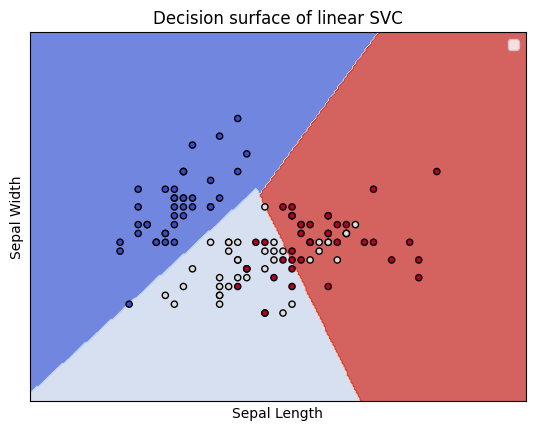

In [32]:
import matplotlib.pyplot as plt
%matplotlib inline

fig, ax = plt.subplots()
title = ('Decision surface of linear SVC')
# To create the mesh grid we use the first and second column
xx, yy = make_meshgrid(X_train[:, 0],X_train[:, 1])
plot_contours(ax, clf, xx, yy, cmap=plt.cm.coolwarm, alpha=0.8)
ax.scatter(X_train[:, 0],X_train[:, 1], c=y_train, cmap=plt.cm.coolwarm, s=20, edgecolors='k')

ax.set_xlabel('Sepal Length')
ax.set_ylabel('Sepal Width')

ax.set_xticks(())
ax.set_yticks(())
ax.set_title(title)
ax.legend()
plt.show()

To test our model on the `test` data, we will **predict** it. **Keep in mind that since we trained with only two features, we should also test with the same two features as well**!

In [33]:
y_predicted = model.predict(X_test[:,0:2])
print(y_predicted)

[2 1 0 2 1 1 2 1 2 1 0 1 2 0 0 1 1 1 2 0 0 1 1 1 0 0 0 2 0 2]


Finally, we can compare the **model's accuracy** of the obtained labels in `y_predicted` against the ground truth in `y_test`:

In [34]:
## Print model's accuracy
comparison = y_predicted == y_test
print('Accuracy', sum(comparison)/len(comparison))

Accuracy 0.8


How would you print the accuracy for each class?

In [35]:
## Use this cell to print the accuracy for each class
## Hint: Use the numpy.where() function to find where does a vector have a certain value i.e. 0/1/2
print('Setosa Acc',sum(y_test[np.where(y_test==0)]==y_predicted[np.where(y_test==0)])/len(y_test[np.where(y_test==0)]))
print('Versicolor Acc',sum(y_test[np.where(y_test==1)]==y_predicted[np.where(y_test==1)])/len(y_test[np.where(y_test==1)]))
print('Virginica Acc',sum(y_test[np.where(y_test==2)]==y_predicted[np.where(y_test==2)])/len(y_test[np.where(y_test==2)]))

Setosa Acc 1.0
Versicolor Acc 0.8
Virginica Acc 0.6


Check out how different kernel types affect the performance of the SVM classifier [here](https://scikit-learn.org/0.18/auto_examples/svm/plot_iris.html). Would you consider using a different kernel for this classifier?